# Frequently Used Package Imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import sklearn as sl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Preprocessing 

In [2]:
#read table
TV=pd.read_csv('TVdata.txt',sep=',', header=0, lineterminator = '\n')
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


In [3]:
print ('number of cols', TV.shape[0])
print ('number of rows', TV.shape[1])

number of cols 4226
number of rows 16


# Part1. Data Preprocessing 

# 1.1 Find out duplicated data

In [4]:
if len(TV.set_index('video_id').index.get_duplicates())==0:
    print ('There is no duplicates')
else:
    print ('The dulicates is',TV.set_index('video_id').index.get_duplicates() )

There is no duplicates


# 1.2 Understand the numerical features

In [5]:
print (TV.drop(['video_id', 'release_year'],axis=1).describe(percentiles = [.1, .25, .5, .75, .95]))
print ((TV == 0).sum())
TV.dtypes

       cvt_per_day  weighted_categorical_position  \
count     4226.000                       4226.000   
mean      4218.630                          7.783   
std      13036.080                          6.134   
min          2.188                          1.000   
10%        141.985                          3.000   
25%        351.169                          4.000   
50%       1193.500                          6.000   
75%       3356.789                          9.000   
95%      14692.834                         22.000   
max     307127.606                         41.000   

       weighted_horizontal_poition  imdb_votes        budget     boxoffice  \
count                     4226.000    4226.000      4226.000      4226.000   
mean                        28.104    6462.924   2150743.439   2536338.472   
std                         11.864   31596.007   7176604.483   8243516.266   
min                          1.000       0.000         0.000         0.000   
10%                       

video_id                           int64
cvt_per_day                      float64
weighted_categorical_position      int64
weighted_horizontal_poition        int64
import_id                         object
release_year                       int64
genres                            object
imdb_votes                         int64
budget                             int64
boxoffice                          int64
imdb_rating                      float64
duration_in_mins                 float64
metacritic_score                   int64
awards                            object
mpaa                              object
star_category                    float64
dtype: object

# cvt_per_day Exploration 

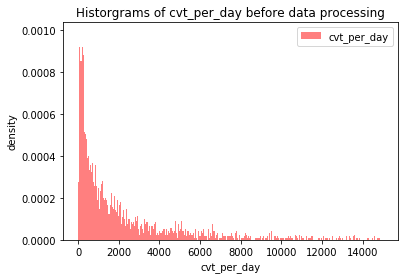

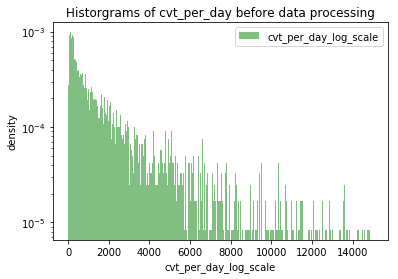

In [6]:
# cvt_per_day data explore
plt.hist(TV['cvt_per_day'].values, bins = range(0,15000, 30), alpha = 0.5, color='r', label = 'cvt_per_day', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

# log scale of y due to large variation
plt.hist(TV['cvt_per_day'].values, log = True, bins = range(0,15000, 30), alpha = 0.5, color='g', label = 'cvt_per_day_log_scale', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day_log_scale')
plt.ylabel('density')
plt.show()

# Find out correlation between features

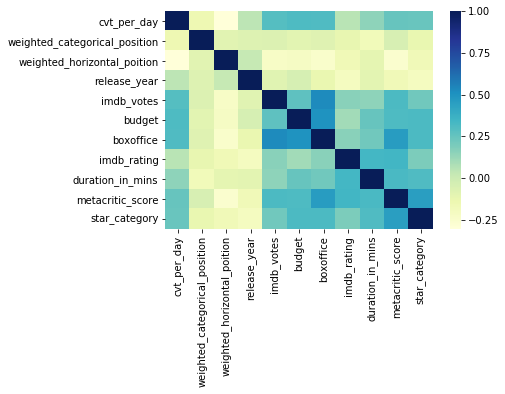

In [7]:
# correlation of the numerical features 
corr = TV[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition'
               ,'release_year', 'imdb_votes', 'budget', 'boxoffice' ,'imdb_rating', 
               'duration_in_mins', 'metacritic_score', 'star_category']].corr()
sns.heatmap(corr, cmap="YlGnBu")
plt.show(sns)

# Undertsanding and Dealing with categorical features

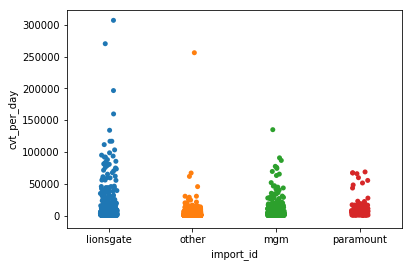

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


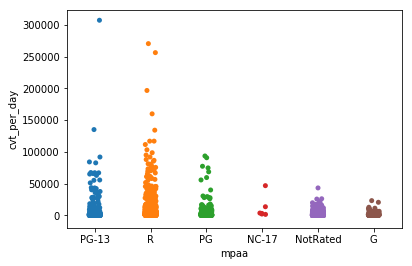

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


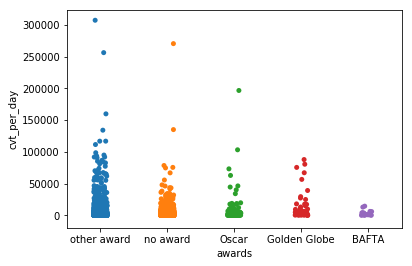

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [8]:
sns.stripplot(x='import_id', y='cvt_per_day', data=TV, jitter=True)
plt.show(sns)
print (TV['import_id'].value_counts())

sns.stripplot(x='mpaa', y='cvt_per_day', data=TV, jitter=True)
plt.show(sns)
print (TV['mpaa'].value_counts())

sns.stripplot(x='awards', y='cvt_per_day', data=TV, jitter=True)
plt.show()
print (TV['awards'].value_counts())

# Distribution of split 'genre' features

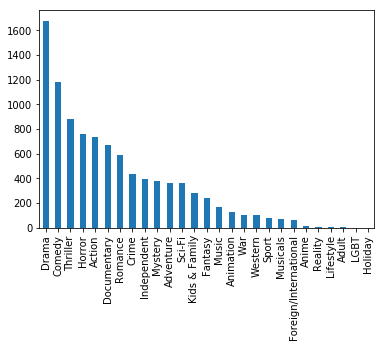

In [9]:
gen_split = TV['genres'].str.get_dummies(sep=',').sum()
gen_split.sort_values(ascending=False).plot.bar()
plt.show()

6 genres including Anime, Reality, Lifestyle, Adult, LGBT, Holiday have low frequencies. Therefore, during feature processing, they will be grouped together as: 'Misc_gen' in the feature 'genres'.

# Distribution of released year
The release year of video varies through a wide range. Considering the popularity of a video usually decays over time, the release_year should be bucketed based on the release_year range.

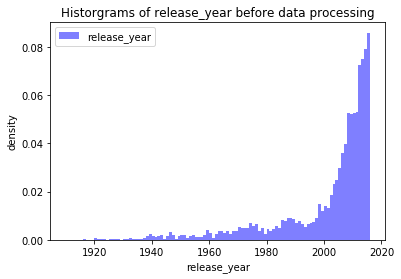

count   4226.000
mean    2001.057
std       17.497
min     1916.000
10%     1974.000
20%     1991.000
30%     2001.000
40%     2006.000
50%     2008.000
60%     2010.000
70%     2012.000
80%     2013.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64


In [10]:
plt.figure(1)
plt.hist(TV['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, color='b', label = 'release_year', normed = True)
plt.legend(loc ='upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

print (TV['release_year'].describe(percentiles = [.1, .2, .3, .4,.5, .6, .7, .8, .9]))

# PART2. Feature Preprocessing
There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

2.1.  The first 3 have relatively small sub-types, they can be easily converted to dummies.（one-hot encoding)

In [11]:
# Convert 3 Categorical variables into dummy variables
d_import_id = pd.get_dummies(TV['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(TV['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(TV['awards']).astype(np.int64)

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.

2.2 The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.

In [12]:
# Convert 'genres' into dummy variables
d_genres = pd.DataFrame() 
for genre in ['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime', 'Documentary', 'Drama'
          , 'Fantasy', 'Foreign/International', 'Holiday', 'Horror', 'Independent', 'Kids & Family', 'LGBT', 
          'Lifestyle', 'Music', 'Musicals','Mystery', 'Reality', 'Romance','Sci-Fi', 'Sport', 'Thriller', 'War', 
          'Western']:
    gen_lst = []
    for i in range(4226):        
        if genre in TV['genres'][i]:
            gen_lst.append(1)    
        else: 
            gen_lst.append(0)  
    d_genres[genre] = pd.Series(gen_lst).values
    
# combine 6 smallest genres into a new genre 'Misc_gen'. Use bitwise operation '|', then drop these 6 columns.
d_genres['Misc_gen'] = d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

2.3 The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [13]:
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014,2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)

2.4  new dataframe, drop the previous categorical features, add new dummy variables, check for null

In [14]:
TV_temp = TV.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)
newTV = pd.concat([TV_temp, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
print( newTV.shape)
print (pd.isnull(newTV).any(1).nonzero()[0])
print (newTV.head())
newTV_0 = newTV.copy()

(4226, 58)
[]
   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  imdb_votes    budget  boxoffice  imdb_rating  \
0                            3       69614  15000000   42930462        6.500   
1                            3       46705  15000000    3301046        6.500   
2                            3      197596  26000000   37397291        7.300   
3                            4      356339  15000000   15700000        7.600   
4                            3       46720  27220000    8551228        6.400   

   duration_in_mins  metacritic_score    ...      1916-1974  1974-1991  \
0           112.301                51    ...              0          0   
1 

# Handling with Missing Values

In [15]:
# mark zero values as NaN
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
# count the number of NaN values in each column
print (newTV.isnull().sum())


video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
lionsgate                           0
mgm                                 0
other                               0
paramount                           0
G                                   0
NC-17                               0
NotRated                            0
PG                                  0
PG-13                               0
R                                   0
BAFTA                               0
Golden Globe                        0
Oscar                               0
no award                            0
other award                         0
Action      

#  Filling missing data with mean value
For imdb_voates and imdb_rating, they always show 'null' together, which is reasonable, since when a imdb_votes is missing, the imdb_rating is mostly also missing. For all 6 features with missiong data, the 1st attempt is to fill in with their mean value.

In [16]:
newTV_i1 = newTV.copy()
newTV_i1['budget'].fillna(newTV_i1['budget'].mean(), inplace=True)
newTV_i1['boxoffice'].fillna(newTV_i1['boxoffice'].mean(), inplace=True)
newTV_i1['metacritic_score'].fillna(newTV_i1['metacritic_score'].mean(), inplace=True)
newTV_i1['star_category'].fillna(newTV_i1['star_category'].mean(), inplace=True)
newTV_i1['imdb_votes'].fillna(newTV_i1['imdb_votes'].mean(), inplace=True)
newTV_i1['imdb_rating'].fillna(newTV_i1['imdb_rating'].mean(), inplace=True)

# Feature Scaling
The impact of different scaling methods on the model performance is small. In the following model training and selections, the standard scaling (sc) data is used. (Normalization)

In [17]:
#Standard scaling
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_sc = newTV_i1.copy()

sc_scale = preprocessing.StandardScaler().fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])

newTV_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# MinMax scaling
newTV_mm = newTV_i1.copy()
mm_scale = preprocessing.MinMaxScaler().fit(newTV_mm[scale_lst])
newTV_mm[scale_lst] = mm_scale.transform(newTV_mm[scale_lst])

In [19]:
# Robust scaling
newTV_rs = newTV_i1.copy()
rs_scale = preprocessing.RobustScaler().fit(newTV_mm[scale_lst])
newTV_rs[scale_lst] = rs_scale.transform(newTV_rs[scale_lst])

# Part 3. Model Selection
80% of the samples will be used to train all the models, and 20% is reserved for test the models in next section.

In [20]:
# The 15% test data will kept aside, they won't be seen by the models until final test/comparison.

model_train, model_test = train_test_split(newTV_sc, test_size=0.15, random_state = 3)
model_train_x = model_train.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test_x = model_test.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train_y = model_train['cvt_per_day']
model_test_y = model_test['cvt_per_day']

# 3.1 Linear Model

# Lasso Linear Regression

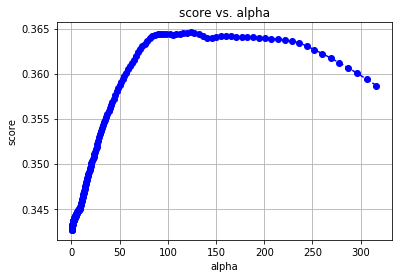

The optimaized alpha and score of Lasso linear is:  123.583303174 0.364598717849


In [21]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn import linear_model

# cross validation
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-0.3, 2.5, num=200)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso linear is: ', opt_a, max_score)

In [22]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = linear_model.Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

# lasso_f is the Lasso model (linear feature), to be tested with final test data.

Lasso(alpha=123.58330317390183, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

# Ridge Linear Regression

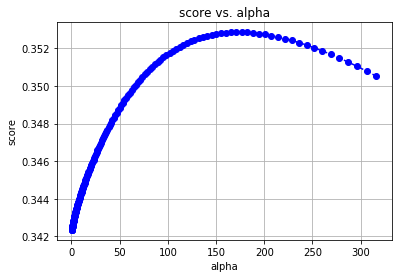

The optimaized alpha and score of Ridge linear is:  170.869015275 0.352860384205


In [23]:
lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-0.3, 2.5, num=200)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = linear_model.Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: ', opt_a, max_score)

In [24]:
# add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = linear_model.Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=170.86901527531668, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

# Ploynomial features-Lasso Linear Regression

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


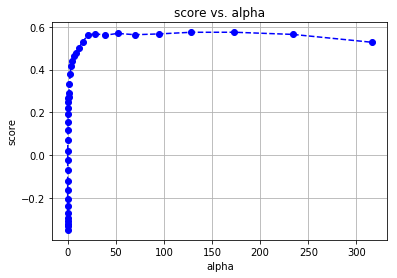

The optimaized alpha and score of Lasso polynomial is:  173.165566686 0.574881063692


Lasso(alpha=173.16556668620782, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']


alphas = np.logspace (-2.6, 2.5, num=40)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_xp, lr_train_y)
    scores[i] = lasso.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso polynomial is: ', opt_a, max_score)

# combine the validate data and training data, use the optimal alpha, re-train the model
lr_train_xp1 = poly.fit_transform(model_train_x)

lasso_fp = linear_model.Lasso()
lasso_fp.set_params(alpha = opt_a)
lasso_fp.fit(lr_train_xp1, model_train_y)

# lasso_fp is the Lasso model (polynomial feature), to be tested with test data.

# Ploynomial features-Ridge Linear Regression

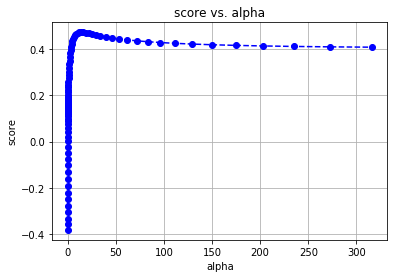

The optimaized alpha and score of Ridge linear is:  13.9413168426 0.47189809453


Ridge(alpha=13.941316842605644, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']




alphas = np.logspace (-2.6, 2.5, num=80)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = linear_model.Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_xp, lr_train_y)
    scores[i] = ridge.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: ', opt_a, max_score)

# combine the validate data and training data, use the optimal alpha, re-train the model
lr_train_xp1 = poly.fit_transform(model_train_x)

ridge_fp = linear_model.Ridge()
ridge_fp.set_params(alpha = opt_a)
ridge_fp.fit(lr_train_xp1, model_train_y)

# Non-Linear Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

rf_train, rf_test = train_test_split(model_train, test_size=0.15, random_state = 0)

rf_train_x = rf_train.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_test_x = rf_test.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_train_y = rf_train['cvt_per_day']
rf_test_y = rf_test['cvt_per_day']

param_grid = {
                 'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62],
                 'max_depth': [12, 13, 14, 15, 16, 17]
             }

rf = RandomForestRegressor(random_state=2, max_features = 'sqrt')
grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(rf_train_x, rf_train_y)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62], 'max_depth': [12, 13, 14, 15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
grid_rf.best_params_ 

{'max_depth': 14, 'n_estimators': 55}

In [29]:
grid_rf.cv_results_

{'mean_fit_time': array([ 0.16541123,  0.18043847,  0.16150756,  0.15512166,  0.16947947,
         0.14681926,  0.19208336,  0.24521298,  0.14457383,  0.1470387 ,
         0.14800224,  0.1515923 ,  0.15258055,  0.17769718,  0.25559402,
         0.30885835,  0.22337356,  0.1835474 ,  0.17067094,  0.21527619,
         0.16628742,  0.1777946 ,  0.169208  ,  0.19855795,  0.1655416 ,
         0.16659245,  0.16400542,  0.16738768,  0.1687479 ,  0.17326355,
         0.18207803,  0.1828742 ,  0.16561556,  0.16832199,  0.17342339,
         0.17496691,  0.17705708,  0.180794  ,  0.18332038,  0.18841825,
         0.17116485,  0.17452173,  0.1782599 ,  0.18165684,  0.18526073,
         0.1917088 ,  0.19011607,  0.19925075]),
 'mean_score_time': array([ 0.00715075,  0.00751276,  0.00681405,  0.00579057,  0.00731735,
         0.00608416,  0.00818033,  0.00835443,  0.00609074,  0.0060739 ,
         0.00625434,  0.00618463,  0.00622182,  0.00852466,  0.01171713,
         0.00895   ,  0.01069431,  0.00

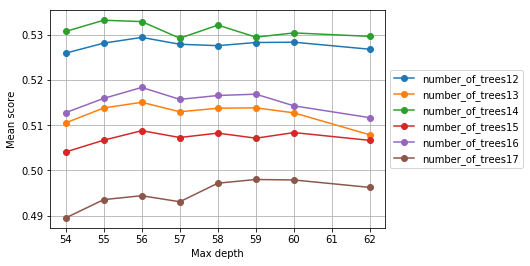

In [30]:
# plot the effect of different number of trees and maximum tree-depth druing cross validation 
scores = grid_rf.cv_results_['mean_test_score']

n_est = [54, 55, 56, 57, 58, 59, 60, 62]
m_depth=[12, 13, 14, 15, 16, 17]
scores = np.array(scores).reshape(len(m_depth), len(n_est))
fig = plt.figure()
ax = plt.subplot(111)
for ind, i in enumerate(m_depth):
    plt.plot(n_est, scores[ind], '-o', label='number_of_trees' + str(i),)
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Max depth')
plt.ylabel('Mean score')
plt.grid(True)
plt.show()
# savefig('rf_1')

In [31]:
# add both training and validation data together as the new training data
rf = RandomForestRegressor(random_state=2, max_features = 'sqrt', max_depth= 14, n_estimators=55)
rf.fit(model_train_x, model_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

The best rf model have n_estimator = 14, and max_depth = 55.

# Model Evaluation 
Test data is the reserved 15% of the whole dataset, and has never been seen by the above models.

# 4.1 Lasso test with linear features (lasso_f)

In [33]:
# Lasso_f test (with linear features)

lasso_f_score = lasso_f.score(model_test_x, model_test_y)
pred_y = lasso_f.predict(model_test_x)

# The mean squared error and root mean square error
MSE_lasso_f = mean_squared_error(model_test_y, pred_y)
RMSE_lasso_f = sqrt(mean_squared_error(model_test_y, pred_y))

print ('lasso_f score: ', lasso_f_score)
print ('Mean square error of lasso_f: ', MSE_lasso_f)
print ('Root mean squared error of lasso_f:', RMSE_lasso_f)
# print ('Coefficients of lasso_f: ', lasso_f.coef_)

lasso_f score:  0.0993092527052
Mean square error of lasso_f:  239016886.018
Root mean squared error of lasso_f: 15460.170956951904


# 4.2 Ridge test with linear features (ridge_f)

In [43]:
# Ridge_f test (with linear features)
ridge_f_score = ridge_f.score(model_test_x, model_test_y)
pred_y = ridge_f.predict(model_test_x)

# The mean squared error and root mean square error
MSE_ridge_f = mean_squared_error(model_test_y, pred_y)
RMSE_ridge_f = sqrt(mean_squared_error(model_test_y, pred_y))

print ('ridge_f score: ', ridge_f_score)
print ('Mean square error of ridge_f: ', MSE_ridge_f)
print ('Root mean squared error of ridge_f:', RMSE_ridge_f)

ridge_f score:  0.113882795751
Mean square error of ridge_f:  235149495.477
Root mean squared error of ridge_f: 15334.584946344039


# 4.3 Lasso test with polynomial features (lasso_fp)

In [50]:
model_test_xp = poly.fit_transform(model_test_x)
pred_y = lasso_fp.predict(model_test_xp)

lasso_fp_score = lasso_fp.score(model_test_xp, model_test_y)
MSE_lasso_fp = mean_squared_error(model_test_y, pred_y)
RMSE_lasso_fp = sqrt(mean_squared_error(model_test_y, pred_y))

print ('lasso_fp score: ', lasso_fp_score)
print ('Mean square error of lasso_fp: ', MSE_lasso_fp)
print ('Root mean squared error of lasso_fp:', RMSE_lasso_fp)

lasso_fp score:  -0.0629618571906
Mean square error of lasso_fp:  282078875.38
Root mean squared error of lasso_fp: 16795.203939806488


# 4.4 Ridge test with polynomial features (ridge_fp)

In [47]:
# ridge_fp test (with polynomial features)
model_test_xp = poly.fit_transform(model_test_x)

ridge_fp_score = ridge_fp.score(model_test_xp, model_test_y)
MSE_ridge_fp = mean_squared_error(model_test_y, pred_y)
RMSE_ridge_fp = sqrt(mean_squared_error(model_test_y, pred_y))

pred_y = ridge_fp.predict(model_test_xp)
print ('ridge_fp score: ', ridge_f_score)
print ('Mean square error of ridge_fp: ', MSE_ridge_fp)
print ('Root mean squared error of ridge_fp:', RMSE_ridge_fp)

ridge_fp score:  0.113882795751
Mean square error of ridge_fp:  287641280.514
Root mean squared error of ridge_fp: 16959.990581184356


# 4.5 Random Forest Test

In [51]:
rf_score = rf.score(model_test_x, model_test_y)

pred_y = rf.predict(model_test_x)
MSE_rf = mean_squared_error(model_test_y, pred_y)
RMSE_rf = sqrt(mean_squared_error(model_test_y, pred_y))

# The mean squared error and root mean square error
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.50839320352
Mean square error of rf:  130458013.467
Root mean squared error of rf: 11421.82181032634


# 4.6 Comparison of the 5 models
Compared the max_score, mean squared error (MSE), and root mean squared error (RMSE) of 5 models. Random forest model rf returns the beset prediction accuracy.

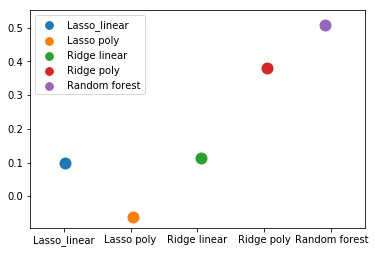

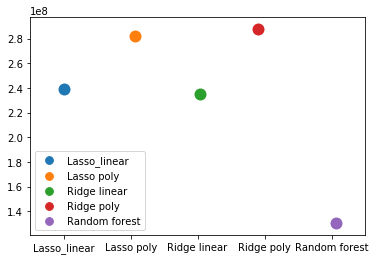

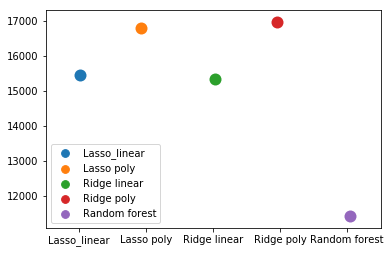

In [88]:
lst_score = [lasso_f_score, lasso_fp_score, ridge_f_score, ridge_fp_score, rf_score]
MSE_lst =  [MSE_lasso_f, MSE_lasso_fp, MSE_ridge_f, MSE_ridge_fp, MSE_rf]
RMSE_lst =  [RMSE_lasso_f, RMSE_lasso_fp, RMSE_ridge_f, RMSE_ridge_fp, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

sns.stripplot(x=model_lst, y=lst_score,jitter=True,size=12,hue=model_lst)
plt.show()

sns.stripplot(x=model_lst, y=MSE_lst,jitter=True,size=12,hue=model_lst)
plt.show()

sns.stripplot(x=model_lst, y=RMSE_lst,jitter=True,size=12,hue=model_lst)
plt.show()

In [89]:
'''
plt.figure(1)
plt.plot(model_lst, lst_score,'ro')
plt.legend(loc = 9)
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(loc = 9)
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(loc = 9)
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()
'''

"\nplt.figure(1)\nplt.plot(model_lst, lst_score,'ro')\nplt.legend(loc = 9)\nplt.legend(['r-squre / score'])\nplt.xlabel('model names',fontsize =16)\nplt.ylabel('score / r square', fontsize =16)\nplt.grid(True)\nplt.show()\n\nplt.figure(2)\nplt.plot(model_lst, MSE_lst, 'g^')\nplt.legend(loc = 9)\nplt.legend(['mean square error (MSE)'])\nplt.xlabel('model names', fontsize =16)\nplt.ylabel('mean square error', fontsize =16)\nplt.grid(True)\nplt.show()\n\nplt.figure(3)\nplt.plot(model_lst, RMSE_lst, 'bs')\nplt.legend(loc = 9)\nplt.legend(['root mean square error (RMSE)'])\nplt.xlabel('model names', fontsize =16)\nplt.ylabel('root mean square error', fontsize =16)\nplt.grid(True)\nplt.show()\n"

# 5. Feature importance
Random forest(RF) shows the best prediction accuracy. Therefore, the feature importance will be extracted from the RF model.

Feature importance ranking:
1. feature 2 weighted_categorical_position (0.153114)
2. feature 0 weighted_horizontal_poition (0.125979)
3. feature 1 imdb_votes (0.122217)
4. feature 7 budget (0.058824)
5. feature 8 boxoffice (0.056730)
6. feature 3 imdb_rating (0.055224)
7. feature 4 duration_in_mins (0.054734)
8. feature 6 metacritic_score (0.042676)
9. feature 9 star_category (0.039899)
10. feature 5 lionsgate (0.032440)
11. feature 11 mgm (0.027291)
12. feature 53 other (0.025557)
13. feature 10 paramount (0.020731)
14. feature 42 G (0.017618)
15. feature 28 NC-17 (0.012257)
16. feature 18 NotRated (0.011334)
17. feature 27 PG (0.010325)
18. feature 49 PG-13 (0.007859)
19. feature 52 R (0.007672)
20. feature 23 BAFTA (0.007548)
21. feature 30 Golden Globe (0.006129)
22. feature 15 Oscar (0.005517)
23. feature 29 no award (0.005429)
24. feature 51 other award (0.005089)
25. feature 17 Action (0.005000)
26. feature 50 Adventure (0.004992)
27. feature 24 Animation (0.004810)
28. feature 

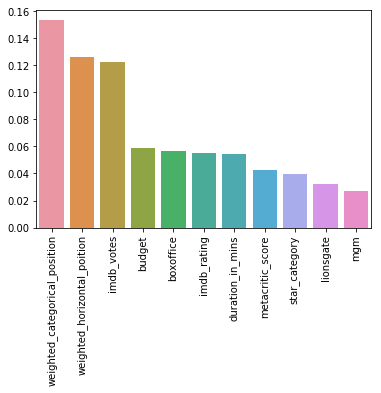

In [98]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = model_test_x.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")

for f in range(model_test_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
    
#plt.figure(1)
#plt.bar(feature_name[:11], indices[:11])
#plt.xticks(rotation=90)
#plt.show()

sns.barplot(x=feature_name[:11], y=importances[indices[:11]])
plt.xticks(rotation=90)
plt.show()

